## Name: Yugandhar Yelai
## Task-2 (Color Identification in Image)

### Import Libraries 

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Displaying the Sample Image 

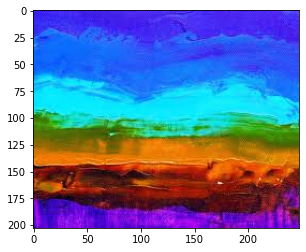

In [2]:
image = cv2.imread('images/image1.jpg')
plt.imshow(image) #BGR format by default in OpenCV

## RGB Image 

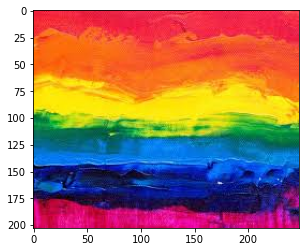

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #CONVERTED INTO RGB
plt.imshow(image)

## Gray Scale Image 

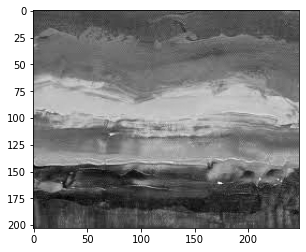

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

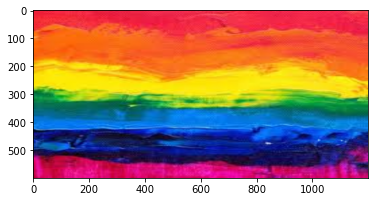

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## Additional Methods For Simplicity 

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

## Extracting Colors from the Image

[array([202.07871109,  12.30066998, 113.0898774 ]),
 array([241.42531402,  47.14507186,  65.88115311]),
 array([246.01998805, 220.36871979,  18.07169627]),
 array([ 22.3558353 ,  22.82643588, 102.71502754]),
 array([248.51676839, 106.64079117,  31.25882305]),
 array([ 12.34603986, 122.04869545,  84.33343018]),
 array([ 11.93245318, 108.75498925, 209.57215229]),
 array([131.52263878, 198.43586606,  43.20324841])]

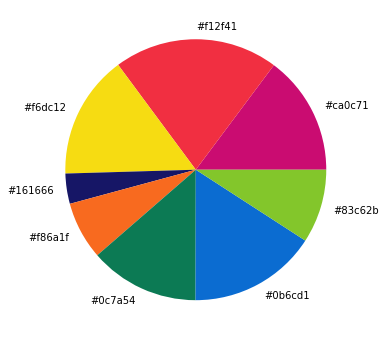

In [7]:
Colors_to_identify = 8
show_pie_chart = True
get_colors(get_image("images/image1.jpg"), Colors_to_identify, show_pie_chart)

## If You want to Apply same for the Complete Folder 

In [8]:
IMAGE_DIRECTORY = 'images'
# Add the Colors If You Want FORMAT: RGB
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [128, 0, 0],
    'BLACK': [0, 0, 0],
    'WHITE': [255, 255, 255]
}
COLOR_DOMINANCE = {
    "HIGH": 1,
    "MEDIUM": 3,
    "LOW": 6
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

## OverView Of the Images 

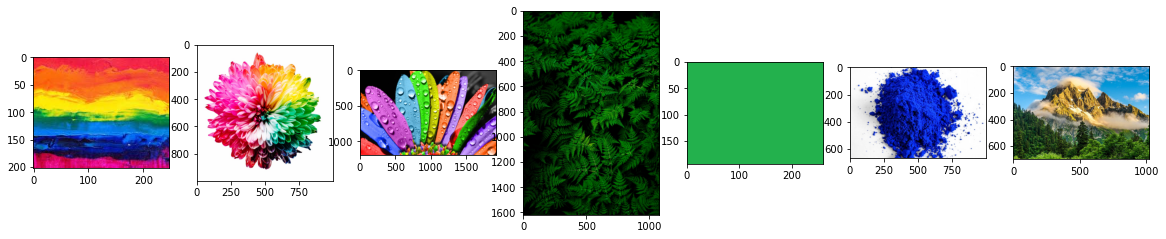

In [9]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

## Function For Searching Images According to the Colors 

In [10]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    select_image = False
    for i in range(number_of_colors):
        try:
            curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
            diff = deltaE_cie76(selected_color, curr_color)
            if (diff < threshold):
                select_image = True
        except:
            pass
    
    return select_image

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            
            plt.subplot(1, len(images), index)
            plt.imshow(images[i])
            index += 1

## FINAL TESTING 

C:\Users\College\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


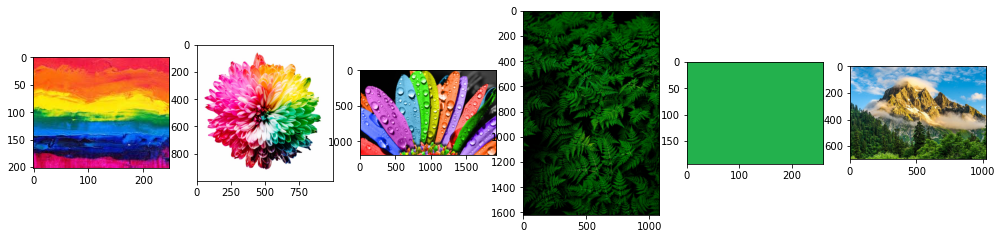

In [13]:
selected_color = COLORS["GREEN"]
threshold = 60
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, threshold, COLOR_DOMINANCE["LOW"])